<a href="https://colab.research.google.com/github/SHermukhammadjon/Mohirdev_Data_Science_praktikum/blob/main/Regressiya/05_ml_07_LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Linear Regression

In [23]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
df = pd.read_csv('https://drive.google.com/uc?id=1e6z8NS2FcKzrjSux7xkhlqSbj9u0Gwj2', index_col=0)
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7460,Яшнободский,1,38.0,5,5,24500.0
7461,Яшнободский,2,49.0,1,4,32000.0
7462,Шайхантахурский,2,64.0,3,9,40000.0
7463,Мирзо-Улугбекский,1,18.0,1,4,11000.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [2]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [3]:
housing = df[df.district=='Чиланзарский']
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


In [4]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [5]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

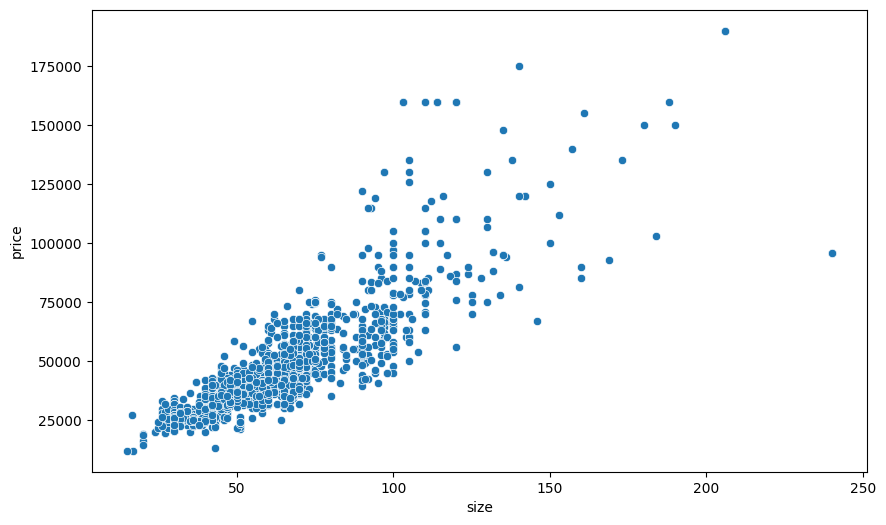

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

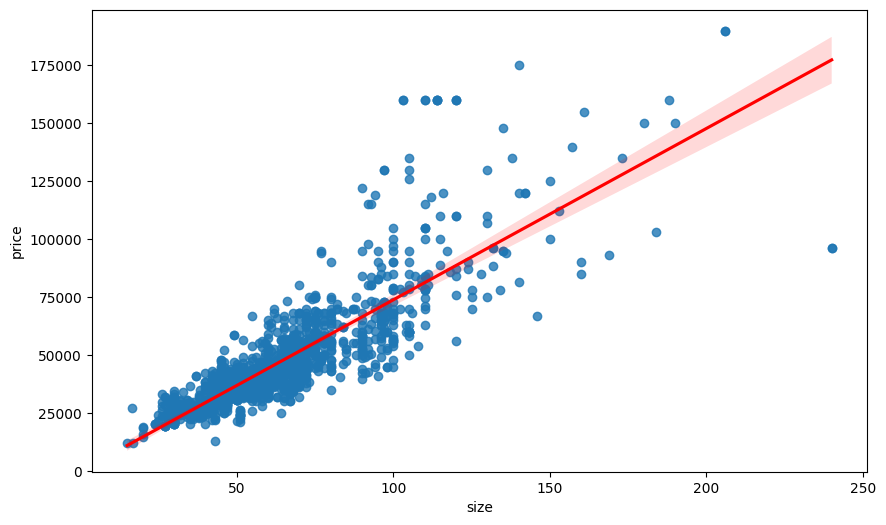

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [25]:
t1 = sum((X - X.mean()) * (y - y.mean())) / sum((X - X.mean())**2)
t1

740.0264822713287

In [26]:
t0 = y.mean() - t1 * X.mean()
t0

-195.94911352690542

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [27]:
indexs = X.sample(10, random_state = 31).index
indexs

Int64Index([1447, 940, 458, 5180, 368, 7352, 4187, 1451, 6069, 1365], dtype='int64')

In [28]:
X_test, y_test = X[indexs], y[indexs]
pd.DataFrame({'X_test' : X_test, 'y_test' : y_test})

,X_test,y_test
1447,58.0,42000.0
940,65.0,52000.0
458,42.0,34000.0
5180,68.0,48900.0
368,44.0,29500.0
7352,60.0,36500.0
4187,32.0,26500.0
1451,142.0,120000.0
6069,57.0,46900.0
1365,54.0,36000.0


In [29]:
class SampleLinearRegression:
  def __init__(self):
    self.t0 = None
    self.t1 = None

  def fit(self, X, y):
    self.t1 = sum((X - X.mean()) * (y - y.mean())) / sum((X - X.mean()) ** 2)
    self.t0 = y.mean() - self.t1 * X.mean()


  def predict(self, X):
    return self.t0 + self.t1 * X

In [30]:
model = SampleLinearRegression()

In [31]:
model.fit(X, y)

In [39]:
predict_y = model.predict(X_test)
pd.DataFrame({'predict_y' : predict_y, 'y_test' : y_test})

,predict_y,y_test
1447,42725.586858,42000.0
940,47905.772234,52000.0
458,30885.163142,34000.0
5180,50125.851681,48900.0
368,32365.216106,29500.0
7352,44205.639823,36500.0
4187,23484.898319,26500.0
1451,104887.811369,120000.0
6069,41985.560376,46900.0
1365,39765.480929,36000.0


In [42]:
r2_score(y_test, y_test)   # :)

1.0

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [44]:
pd.DataFrame({'y_test' : y_test, 'predict_X' : predict_y})

,y_test,predict_X
1447,42000.0,42725.586858
940,52000.0,47905.772234
458,34000.0,30885.163142
5180,48900.0,50125.851681
368,29500.0,32365.216106
7352,36500.0,44205.639823
4187,26500.0,23484.898319
1451,120000.0,104887.811369
6069,46900.0,41985.560376
1365,36000.0,39765.480929


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
mean_squared_error(y_test, predict_y)

37188009.35094734

In [49]:
mean_absolute_error(y_test, predict_y)

4653.8569957348245

In [58]:
def my_mean_absolute_error(predict_y, y_test):
  m = len(predict_y)
  return abs(predict_y - y_test).sum() / m

In [59]:
my_mean_absolute_error(predict_y, y_test)

4653.8569957348245

In [60]:
def my_mean_squared_error(predict_y, y_test):
  m = len(predict_y)
  return sum((y_test - predict_y) ** 2) / m

In [61]:
my_mean_squared_error(y_test, predict_y)

37188009.35094734